### E1 Rabi Frequencies near 614 nm for Raman Transitions


Following James App. Phys B 66, 1998, we have for the Rabi frequency:

$$\large \Omega = \frac{e}{\hbar}\sqrt{\frac{2A_{21}I}{k^3\epsilon_0c^2\alpha}}\sigma$$

with $\sigma$ given by:

$$ \large\sigma = \sqrt{\frac{3(2F+1)}{4}} \left \vert \sum\limits_{q=-1}^{q=1}\begin{pmatrix} F & 1 & F'\\ -m & q &m'\end{pmatrix}c_{i}^{(q)} \epsilon_i \right\vert$$


$F$ is the total angular mometum in the lower manifold, and the $c^{(q)}$s are given by:

$c^{(1)} = -\frac{1}{\sqrt{2}}(1,-i,0)$

$c^{(0)} = (0,0,1)$

$c^{(-1)} = \frac{1}{\sqrt{2}}(1,i,0)$

Writing out $\sigma$ a little further gives before defining are polarization components gives:

$$ \sigma = \sqrt{\frac{3(2F+1)}{4}} \left \vert  \begin{pmatrix} F & 1 & F'\\ -m & -1 &m'\end{pmatrix}-\frac{1}{\sqrt{2}} (\epsilon_x - i\epsilon_y) +  \begin{pmatrix} F & 1 & F'\\ -m & -0 &m' \end{pmatrix} \epsilon_z + \begin{pmatrix} F & 1 & F'\\ -m & 1 &m' \end{pmatrix}\frac{1}{\sqrt{2}}(\epsilon_x + i\epsilon_y)   \right\vert$$

where we have rexpressed the polarization in the spherical basis. We can define the polarization components in terms of angles like we did for quadrupole transitions $\vec{\epsilon} =(\cos\gamma\cos\phi,\sin\gamma,-\cos\gamma\sin\phi)$, giving:

$g^{(0)} = \vert \cos\gamma\sin\phi\vert$

$g^{(-1)} = \frac{1}{\sqrt{2}} \vert \cos\gamma\cos\phi - i\sin\gamma\vert$

$g^{(1)} = \frac{1}{\sqrt{2}}\vert \cos\gamma\cos\phi + i\sin\gamma\vert$

However, we typically will only care about pure $\pi$ and $\sigma^{\pm}$ light, which can easily be determined by inspection. 

### Single Photon Rabi Frequency

In [44]:
### now actually calculate something.....
from sympy.physics.wigner import wigner_3j as wig
# P3/2 decay rate
A21 = 2*np.pi*5.9e6
q = 1.602176634e-19
e0 = 8.8541878128e-12
c = 2.99792458e8
alpha = 7.297352e-3
lam = c/487.989e12
k = 2*np.pi/lam
hbar = 1.0545718e-34

# define intensity
# beam waist
w = (30.e-6)
# laser power
P = 1000.e-3
# on axis intensity
I = 2*P/np.pi/w**2
Isat = np.pi*hbar*2*np.pi*c*(2*np.pi*25.6e6)**2/3/lam**3/A21

print 'Intensity :', '{:.3e}'.format(I) + '  W/m^2'
print 'Isat 614 nm:', '{:.3e}'.format(Isat) + '  W/m^2'


# write out components to make defining pure circularly polarized light 
# more transparent. Don't forget to keep the components normalized to 1

ex =  1/np.sqrt(2)
ey =  1j*1/np.sqrt(2)
ez =  0

# Define uppler and lower states
# upper
FP = 2
mFP = 1

#lower
F = 2
mF = 0

# Generalize the rabi fequency function to include all params.
def Rabi(FP,mFP, F, mF, A21, k, ex, ey, ez, I):
    
    # calc gs
    g0 = ez
    gm1 = 1/np.sqrt(2)*(ex - 1j*ey)
    g1 = 1/np.sqrt(2)*(ex + 1j*ey)
    
    # first just do the prefactor with no 3j
    f = q/hbar*np.sqrt(2*I/c/e0)*sqrt(A21/c/alpha/k**3)*sqrt(3*(2.*F+1)/4)
    
    # for each value of q, we need to sum over i for the geometric factor. 
    # np.abs gives us the magnitude of a complex number 
    f2  =\
        g0*float(wig(F,1,FP,-mF, 0, mFP)) +  \
        g1*float(wig(F,1,FP,-mF, 1, mFP)) + \
        gm1*float(wig(F,1,FP,-mF, -1, mFP))
    
    return f*f2
    
omega = Rabi(FP, mFP, F, mF, A21, k, ex, ey, ez,I)

print 'Rabi :', '{:.3e}'.format(omega/2/np.pi*1e-6) + '  MHz'
# this single photon rabi frequency is insanely high, but I think it's right

Intensity : 7.074e+08  W/m^2
Isat 614 nm: 6.262e+02  W/m^2
Rabi : 1.360e+04+0.000e+00j  MHz


### Raman Rabi Frequency

Very simple two photon Rabi frequency calculations given by: 

$$\large \Omega_{\mathrm{R}} = \frac{ \Omega_\mathrm{R1}  \Omega_\mathrm{R2} } {2\Delta}$$

with  $\Omega_\mathrm{R1}$ and $\Omega_\mathrm{R2}$ the two single photon Rabi frequencies, and $\Delta$ is the detuning from the upper level.

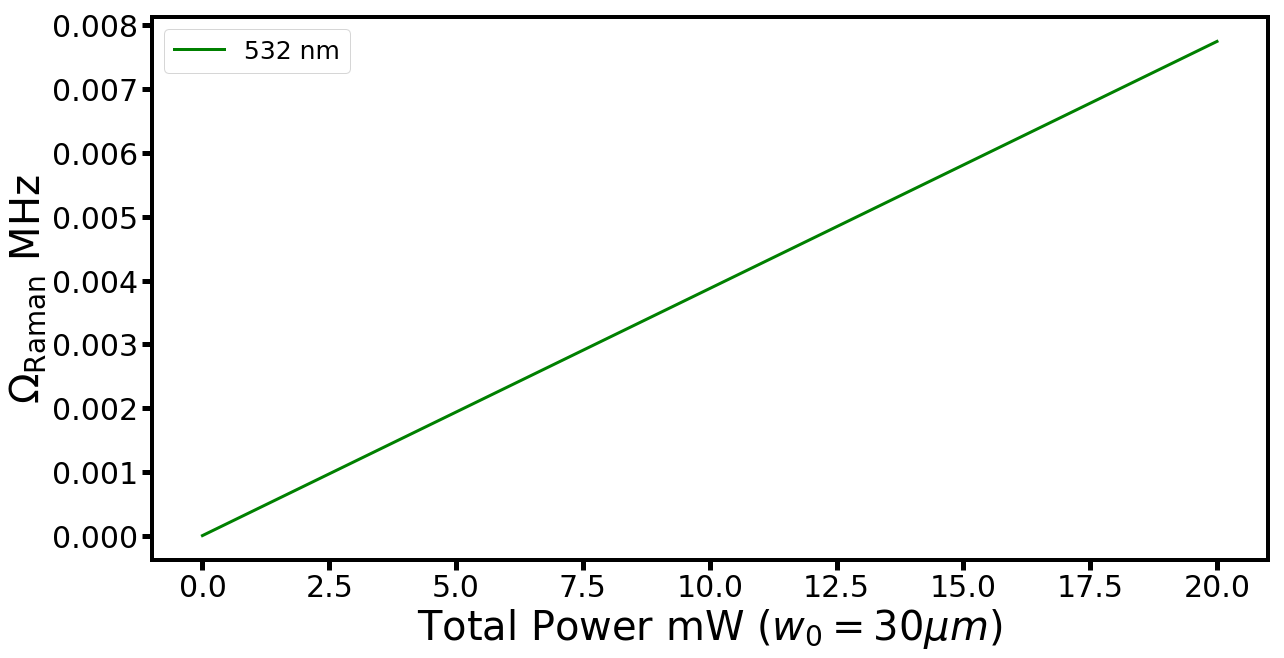

In [22]:
## Few definitions
lam_614 = c/487.989e12
k = 2*np.pi/lam_614
A21 = 2*np.pi*5.9e6


# beam waist
w = (30.e-6)
P = np.linspace(0,10.e-3, 1000)
#P = 1.
# WE ASSUME EACH BEAM HAS THIS MUCH POWER, TOTAL NEEDed IS 2X THIS
# on axis intensity
I = 2*P/np.pi/w**2


# detunings, convert to frequency rad/s
delta_405 = 2*np.pi*c*(1/lam_614 - 1/405.e-9)
delta_532 = 2*np.pi*c*(1/lam_614 - 1/532.e-9)
delta_633 = 2*np.pi*c*(1/lam_614 - 1/633.e-9)
delta_780 = 2*np.pi*c*(1/lam_614 - 1/780.e-9)



# Calculate single photon Rabi frequency
# we want circularly polarized light
ex = 1/np.sqrt(2)
ey = 1j/np.sqrt(2)
ez = 0

# MAKE SURE UPPER STATE IS ALWAYS PRIMED, OTHERWISE FORMULA IS WRONG
# upper
FP = 2
mFP = 1

# lower
F = 2
mF = 0

#Rabi(FP, mFP, F, mF, A21, k, ex, ey, ez,I)
omega1  = Rabi(FP, mFP, F, mF, A21, k, ex, ey, ez, I) 
# MAKE SURE UPPER STATE IS ALWAYS PRIMED, OTHERWISE FORMULA IS WRONG
# upper
FP = 2
mFP = 1

# lower
F = 3
mF = 0
omega2  = Rabi(FP, mFP, F, mF, A21, k, ex, ey, ez, I) 



OR_405 = np.abs(omega1*omega2/2/delta_405)/np.pi/2
OR_532 = np.abs(omega1*omega2/2/delta_532)/np.pi/2
OR_633 = np.abs(omega1*omega2/2/delta_633)/np.pi/2
OR_780 = np.abs(omega1*omega2/2/delta_780)/np.pi/2

# remember we used P for each beam, so the total power is twice as much
#plot(2*P*1e3, OR_405*1e-6, color = 'b', linewidth = 3, label = r'405 nm')
plot(2*P*1e3, OR_532*1e-6, color = 'g', linewidth = 3, label = r'532 nm')
#plot(2*P*1e3, OR_633*1e-6, color = 'orange', linewidth = 3, label = r'633 nm')
#plot(2*P*1e3, OR_780*1e-6, color = 'r',  linewidth = 3, label = r'780 nm')


legend(fontsize = 25)
xlabel(r'Total Power mW ($w_0  = 30 \mu m$)', fontsize = 40)
ylabel(r'$\Omega_{\mathrm{Raman}}$ MHz', fontsize = 40)
tick_params(labelsize = 30)
tick_params(width=5, length=10)
show()


0.564841371458
(9619.959410913605+0j)
(-6084.19654737173+0j)
-9619.959410913605j
-6084.19654737173j


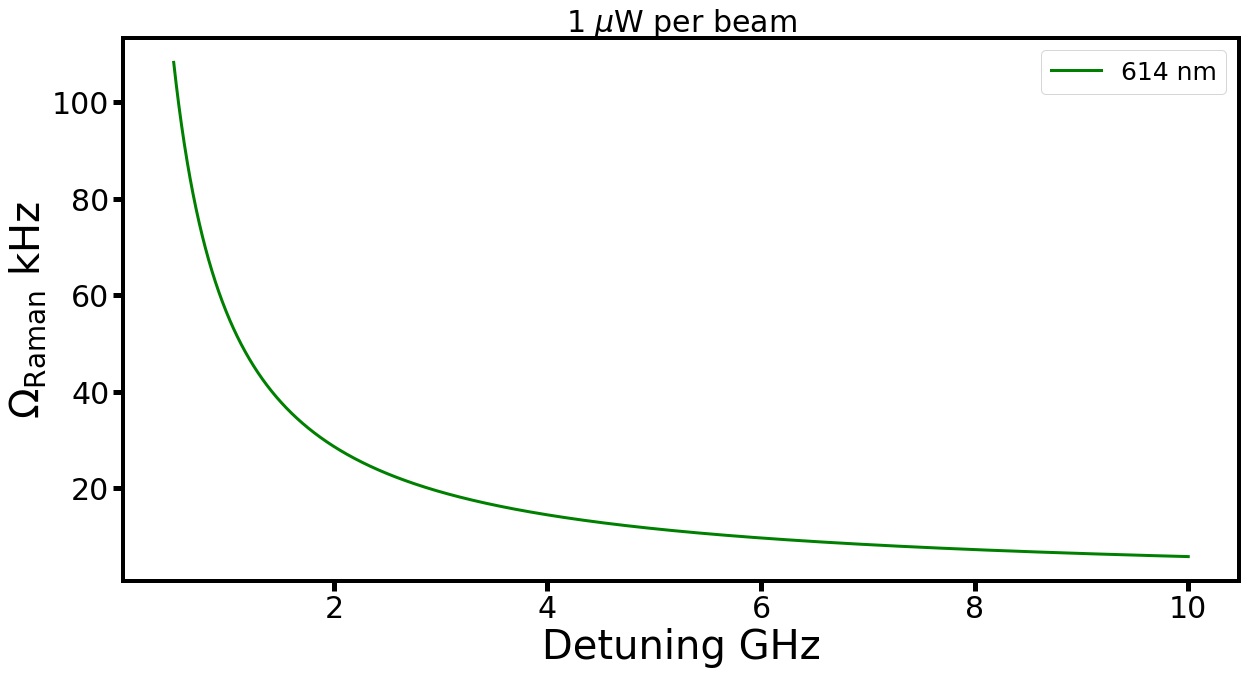

In [47]:
rcParams['axes.linewidth'] = 4
rcParams["figure.figsize"] = 20, 10

# What about using the 614 nm slightly detuned
# if we don't care about high fidelity

## Few definitions
lam_614 = c/487.989e12
k = 2*np.pi/lam_614
A21 = 2*np.pi*5.9e6


# beam waist
w = (30.e-6)
#P = np.linspace(0,10.e-6, 1000)
P = 1.e-6
# WE ASSUME EACH BEAM HAS THIS MUCH POWER, TOTAL NEEDed IS 2X THIS
# on axis intensity
I = 2*P/np.pi/w**2
print I/Isat/2

# detunings, convert to frequency rad/s

delta_614_1 = np.linspace(.5e9,10.e9,10000)*2*np.pi
delta_614_2 = (np.linspace(.5e9,10.e9,10000)+ 89.e6)*2*np.pi

# Calculate single photon Rabi frequency
# we want circularly polarized light
ex = 1#/np.sqrt(2)
ey = 0*1j/np.sqrt(2)
ez = 0

# 1st Raman beam
# MAKE SURE UPPER STATE IS ALWAYS PRIMED, OTHERWISE FORMULA IS WRONG
# upper
FP = 2
mFP = 1

# lower
F = 2
mF = 0

#Rabi(FP, mFP, F, mF, A21, k, ex, ey, ez,I)
omega1  = Rabi(FP, mFP, F, mF, A21, k, ex, ey, ez, I) 

# MAKE SURE UPPER STATE IS ALWAYS PRIMED, OTHERWISE FORMULA IS WRONG
# upper
FP = 2
mFP = 1

# lower
F = 3
mF = 0
omega2  = Rabi(FP, mFP, F, mF, A21, k, ex, ey, ez, I) 

print omega1/np.pi/2/1e3
print omega2/np.pi/2/1e3

OR_614_1 = omega1*omega2/2/delta_614_1/np.pi/2


ex = 0*1#/np.sqrt(2)
ey = 1#*1j/np.sqrt(2)
ez = 0


# 2nd Raman Beam
# MAKE SURE UPPER STATE IS ALWAYS PRIMED, OTHERWISE FORMULA IS WRONG
# upper
FP = 2
mFP = -1

# lower
F = 2
mF = 0

#Rabi(FP, mFP, F, mF, A21, k, ex, ey, ez,I)
omega1  = Rabi(FP, mFP, F, mF, A21, k, ex, ey, ez, I) 

# MAKE SURE UPPER STATE IS ALWAYS PRIMED, OTHERWISE FORMULA IS WRONG
# upper
FP = 2
mFP = -1

# lower
F = 3
mF = 0
omega2  = Rabi(FP, mFP, F, mF, A21, k, ex, ey, ez, I) 

print omega1/np.pi/2/1e3
print omega2/np.pi/2/1e3

OR_614_2 = omega1*omega2/2/delta_614_2/np.pi/2

OR_614 = np.abs(OR_614_1 + OR_614_2)

plot(delta_614_1/2/np.pi/1e9, OR_614*1e-3, color = 'g', linewidth = 3, label = r'614 nm')



legend(fontsize = 25)
xlabel(r'Detuning GHz', fontsize = 40)
ylabel(r'$\Omega_{\mathrm{Raman}}$ kHz', fontsize = 40)
tick_params(labelsize = 30)
tick_params(width=5, length=10)
title(r'1 $\mu$W per beam', fontsize = 30)
show()


### Use 4th order Runge Kutta to calculate 3-level time dependence

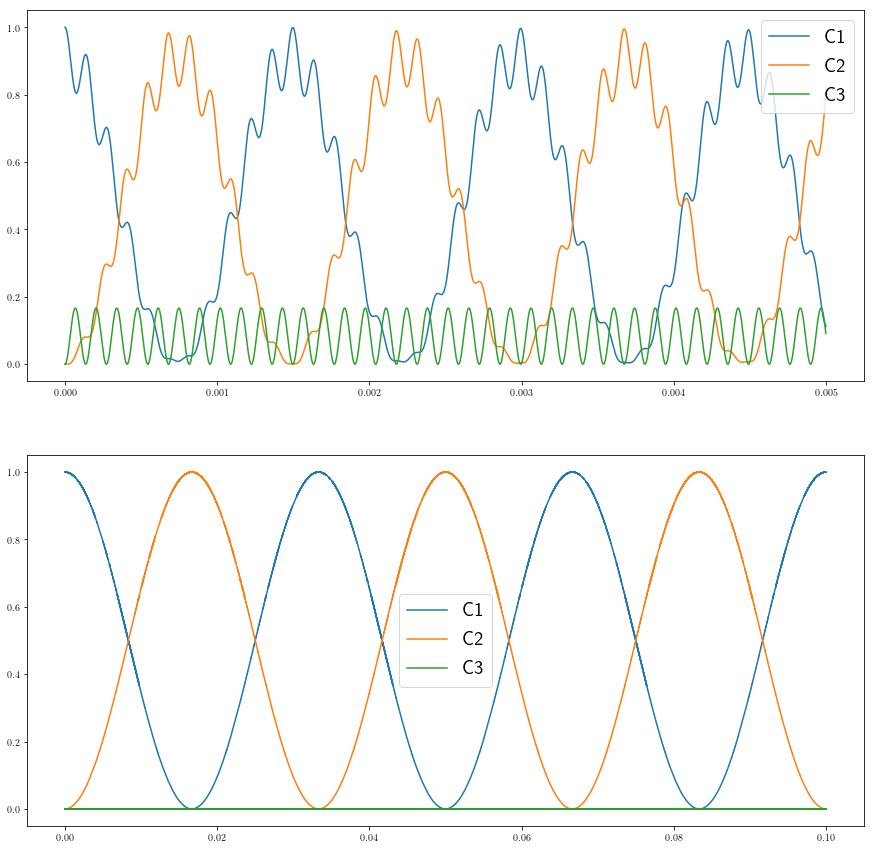

In [193]:
# First I want to play around with some different values of detuning/Rabi frequency ratio and also make sure
# my numerics make sense
import cProfile
c = 2.99792458e8
omega_r = 2*np.pi*3e3
omega_b = 2*np.pi*3e3
delta_b = 2*omega_b
#delta_b = 2*np.pi*c*(1./614e-9 - 1./532.e-9) 
#delta_r = 2*np.pi*c*(1./614e-9 - 1./532.e-9) 
delta_t = 1.e-6
N_steps = int(5e3)
t = np.arange(0,N_steps,1)*delta_t
y0 = np.array([1,0,0])
y = np.zeros((N_steps,len(y0)),dtype=complex)
y[0] = y0

# first the terrible long way
def alpha(y1, y2, y3, t):
    return -1j*y3*omega_b/2*np.exp(-1j*delta_b*t)

def beta(y1, y2, y3, t):
    return -1j*y3*omega_r/2*np.exp(-1j*delta_b*t)

def gamma(y1, y2, y3, t):
    return -1j*(y1*omega_b/2*np.exp(1j*delta_b*t) + y2*omega_r/2*np.exp(1j*delta_b*t))

for i in range(N_steps-1):
    k11 = delta_t*alpha(y[i,0],y[i,1],y[i,2],t[i])
    k12 = delta_t*beta( y[i,0],y[i,1],y[i,2],t[i])
    k13 = delta_t*gamma(y[i,0],y[i,1],y[i,2],t[i])
    

    k21 = delta_t*alpha(y[i,0] + k11/2, y[i,1] +k12/2, y[i,2]+k13/2, t[i]+delta_t/2)
    k22 = delta_t*beta( y[i,0] + k11/2, y[i,1] +k12/2, y[i,2]+k13/2, t[i]+delta_t/2)
    k23 = delta_t*gamma(y[i,0] + k11/2, y[i,1] +k12/2, y[i,2]+k13/2, t[i]+delta_t/2)
    
    k31 = delta_t*alpha(y[i,0] + k21/2, y[i,1] +k22/2, y[i,2]+k23/2, t[i]+delta_t/2)
    k32 = delta_t*beta( y[i,0] + k21/2, y[i,1] +k22/2, y[i,2]+k23/2, t[i]+delta_t/2)
    k33 = delta_t*gamma(y[i,0] + k21/2, y[i,1] +k22/2, y[i,2]+k23/2, t[i]+delta_t/2)
    
    k41 = delta_t*alpha(y[i,0] + k31, y[i,1] +k32, y[i,2]+k33, t[i]+delta_t)
    k42 = delta_t*beta( y[i,0] + k31, y[i,1] +k32, y[i,2]+k33, t[i]+delta_t)
    k43 = delta_t*gamma(y[i,0] + k31, y[i,1] +k32, y[i,2]+k33, t[i]+delta_t)
    
    y[i+1,0] = y[i,0] + (k11 + 2*k21 + 2*k31 + k41)/6
    y[i+1,1] = y[i,1] + (k12 + 2*k22 + 2*k32 + k42)/6
    y[i+1,2] = y[i,2] + (k13 + 2*k23 + 2*k33 + k43)/6


subplot(2,1,1)  
plot(t, y[:,0]*np.conj(y[:,0]), label = 'C1')
plot(t, y[:,1]*np.conj(y[:,1]), label = 'C2')
plot(t, y[:,2]*np.conj(y[:,2]),  label = 'C3')    
legend(fontsize = 20)


# increase the detuning so we can see the improvement
delta_b = 50*omega_b
# need a smaller time step with the larger detuning
delta_t = 1.e-7
N_steps = int(1e6)
t = np.arange(0,N_steps,1)*delta_t

# easier way
def three_level(y, t):
    F = np.array([[0,0,-1j*omega_b/2*np.exp(-1j*delta_b*t)], [0,0,-1j*omega_r/2*np.exp(-1j*delta_b*t)],\
                 [-1j*omega_b/2*np.exp(1j*delta_b*t),  -1j*omega_r/2*np.exp(1j*delta_b*t),0]])
    return np.array(np.matmul(F,y))

y = np.zeros((N_steps,len(y0)),dtype=complex)
y[0] = y0

for i in range(N_steps-1):

    k1 = delta_t*three_level(y[i],t[i])
    k2 = delta_t*three_level(y[i] + k1/2, t[i]+delta_t/2)
    k3 = delta_t*three_level(y[i] + k2/2, t[i]+delta_t/2)
    k4 = delta_t*three_level(y[i] + k3, t[i]+delta_t)
    
    y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4)/6


subplot(2,1,2)
plot(t, y[:,0]*np.conj(y[:,0]), label = 'C1')
plot(t, y[:,1]*np.conj(y[:,1]), label = 'C2')
plot(t, y[:,2]*np.conj(y[:,2]),  label = 'C3')
legend(fontsize = 20)


show()

#cProfile.run('three_level')

### Metastable Raman Transitions

Now I want to consider Raman transitions using the metastable qubit levels in $D_{5/2}$. I will assume perfect linear polarization for now using the lin-perp-lin configuration. 

<img src="metastable_diagram.png">

I will also include the two levels in the P$_{3/2};F=1$ manifold which can couple to the D$_{5/2};F=2$.

The Hamiltonian is given by:

$H = 
\begin{pmatrix}
0 & 0 & \frac{\Omega_{31}}{2}e^{i(\omega_bt +\phi_b)} & \frac{\Omega_{41}}{2}e^{i(\omega_bt +\phi_b)} & \frac{\Omega_{51}}{2}e^{i(\omega_bt +\phi_b)} & \frac{\Omega_{61}}{2}e^{i(\omega_bt +\phi_b)}\\
0 & \omega_{21} & \frac{\Omega_{32}}{2}e^{i(\omega_rt +\phi_r)} & 0 & 0 & \frac{\Omega_{62}}{2}e^{i(\omega_rt +\phi_r)}\\
\frac{\Omega_{31}^*}{2}e^{-i(\omega_bt +\phi_b)} &  \frac{\Omega_{32}^*}{2}e^{-i(\omega_rt +\phi_r)}& \omega_{31} & 0 & 0 &0\\
\frac{\Omega_{41}^*}{2}e^{-i(\omega_bt +\phi_b)}&0 &0 & \omega_{41} & 0 & 0\\
\frac{\Omega_{51}^*}{2}e^{-i(\omega_bt +\phi_b)}&0 &0 &0 &  \omega_{51} & 0\\
\frac{\Omega_{61}^*}{2}e^{-i(\omega_bt +\phi_b)}& \frac{\Omega_{62}^*}{2}e^{-i(\omega_rt +\phi_r)} &0 &0 &  0 & \omega_{61}\\
\end{pmatrix}$

With the Rabi frequency defined as:
$\Omega_{n,n'} = \frac{2eE_0}{\sqrt{2}\hbar}\langle n \vert r^1_1 + r^1_{-1}\vert n'\rangle$

We now use the following linear transformation to remove the time dependence from the Hamiltonian:

$U = 
\begin{pmatrix}
e^{i\omega_bt} & 0 & 0 & 0 & 0 &0\\
0& e^{i\omega_rt} & 0 & 0 & 0 &0\\
0& 0 & 1 & 0 & 0 &0\\
0& 0 & 0 & 1 & 0 &0\\
0& 0 & 0 & 0 & 1 &0\\
0& 0 & 0 & 0 & 0 &1\\
\end{pmatrix},
$

$H' = U^{\dagger}HU$,

$\vert \psi'\rangle = U^\dagger\vert\psi\rangle$.

The "effective" Hamiltonian, which follows a Shrodinger like equation given by:

$\tilde{H} =  U^{\dagger}HU - iU^\dagger\frac{\partial U}{\partial t}$.

This gives

$\tilde{H} = 
\begin{pmatrix}
0 & 0 & \frac{\Omega_{31}}{2}e^{i(\phi_b)} & \frac{\Omega_{41}}{2}e^{i(\phi_b)} & \frac{\Omega_{51}}{2}e^{i(\phi_b)} & \frac{\Omega_{61}}{2}e^{i(\phi_b)}\\
0 & \Delta_b - \Delta_r & \frac{\Omega_{32}}{2}e^{i(\phi_r)} & 0 & 0 & \frac{\Omega_{62}}{2}e^{i(\phi_r)}\\
\frac{\Omega_{31}^*}{2}e^{-i(\phi_b)} &  \frac{\Omega_{32}^*}{2}e^{-i(\phi_r)}& \Delta_b & 0 & 0 &0\\
\frac{\Omega_{41}^*}{2}e^{-i(\phi_b)}&0 &0 & \Delta_b + \Delta_p & 0 & 0\\
\frac{\Omega_{51}^*}{2}e^{-i(\phi_b)}&0 &0 &0 &  \Delta_b + \Delta_p& 0\\
\frac{\Omega_{61}^*}{2}e^{-i(\phi_b)}& \frac{\Omega_{62}^*}{2}e^{-i(\phi_r)} &0 &0 &  0 & \Delta_b \\
\end{pmatrix}$

We can follow the standard procedure for the adiabatic elimination, where we claim $\dot{C}_3 = \dot{C}_4 = \dot{C}_5 = \dot{C}_6 = 0$. We can the solve for $C_3, C_4, C_5, C_6$:

$C_4 = -C_1\frac{\Omega_{61}}{2(\Delta_b + \Delta_P)}$

$C_5 = -C_1\frac{\Omega_{51}}{2(\Delta_b + \Delta_P)}$

$C_3 = -C_1\frac{\Omega_{31}}{2\Delta_b} - C_2\frac{\Omega_{32}}{2\Delta_b}$

$C_6 = -C_1\frac{\Omega_{61}}{2\Delta_b} - C_2\frac{\Omega_{62}}{2\Delta_b}$

In [94]:
#!jupyter nbconvert --to html "E1 Raman Transitions.ipynb"


[NbConvertApp] Converting notebook E1 Raman Transitions.ipynb to html
[NbConvertApp] Writing 363032 bytes to E1 Raman Transitions.html


Lets look at some of the numbers from the Roe Ozeri paper.

Raman scattering error to S at 532 nm:  5.14e-07
Total scattering error only S at 532 nm:  3.84e-06
D scattering error at 532 nm:  1.28e-06


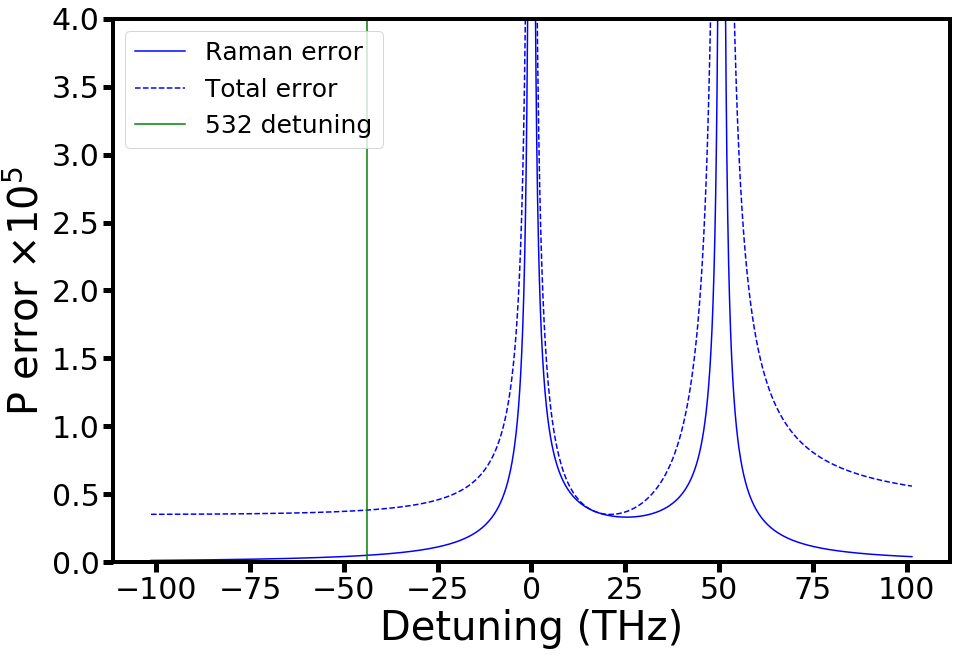

In [45]:
rcParams['axes.linewidth'] = 4
rcParams["figure.figsize"] = 15, 10

d_branch = 1./3
gamma = 2*np.pi*20.1e6
f_493 = 2*np.pi*607.426000e12
f_455 = 2*np.pi*658.115000e12
f_532 = 2.99792458e8/532.e-9*2*np.pi
#print f_532/1e12/2/np.pi
omega_f = f_455 - f_493
delta = np.linspace(-2*omega_f, 2*omega_f, 10000)
delta_532 =  f_532 - f_493 
P_S_raman = 2*np.pi*gamma*omega_f/3/np.abs(delta*(delta-omega_f))
P_S_raman_532 = 2*np.pi*gamma*omega_f/3/np.abs(delta_532*(delta_532-omega_f))
P_tot = np.pi*gamma/omega_f*(2*delta**2 + (delta-omega_f)**2)/np.abs(delta*(delta-omega_f))
P_tot_532 = np.pi*gamma/omega_f*(2*delta_532**2 + (delta_532-omega_f)**2)/np.abs(delta_532*(delta_532-omega_f))
print 'Raman scattering error to S at 532 nm: ',  '{:.2e}'.format(P_S_raman_532)
print 'Total scattering error only S at 532 nm: ',  '{:.2e}'.format(P_tot_532)
print 'D scattering error at 532 nm: ',  '{:.2e}'.format(P_tot_532*d_branch)
plot(delta/2/np.pi/1e12, P_S_raman*1e5 ,color = 'b', label = 'Raman error')
plot(delta/2/np.pi/1e12, P_tot*1e5, color = 'b', linestyle = '--',label =  'Total error')
plot([delta_532/2/np.pi/1e12,delta_532/2/np.pi/1e12], [0,4], color = 'g', label =  '532 detuning')
ylabel(r'P error $\times 10^5$', fontsize = 40)
xlabel(r'Detuning (THz)', fontsize = 40)
tick_params(labelsize = 30)
tick_params(width=5, length=10)
ylim([0, 4])
legend(fontsize = 25)
show()

In [31]:
# now lets look at the laser power required for that for a 1 MHz rabi frequency
gamma = 2*np.pi*20.1e6
f_493 = 2*np.pi*607.426000e12
f_455 = 2*np.pi*658.115000e12
f_532 = 2.99792458e8/532.e-9*2*np.pi
lam_455 = 455.e-9
w0 = 40.e-6
omegaR = 2*np.pi*.5e6
hbar = 1.1054e-34

P_532 = 2*np.pi/3/P_S_raman_532*hbar*f_455*omegaR*(2*np.pi*w0/lam_455)**2
print "Power for 1 MHz Rabi freq at 532 nm: ", '{:.1f}'.format(P_532), 'W'

Power for 1 MHz Rabi freq at 532 nm:  1.8 W


In [34]:
# What is the bound for the 2-qubit gate error??

lam_532 = 532.e-9
hbar = 1.054e-34
k = 2*np.pi/lam_532
m = 133*1.66e-27
kb = 1.38e-23
omega_r = 2*np.pi*1e6
omega_z = omega_r/2.
gamma_493 = 2*np.pi*20e6

eta_r = k*np.sqrt(hbar/2/m/omega_r)
print "532 Lamb-Dicke factor", '{:.2f}'.format(eta_r)

P_2Q_error = 2*np.pi*gamma*d_branch*4/omega_f/eta_r
print 'Total 2 qubit gate error limit: ',  '{:.2e}'.format(P_2Q_error)


 532 Lamb-Dicke factor 0.07
Total 2 qubit gate error limit:  4.56e-05
